In [1]:
import os
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_sales = pd.read_csv('sales_train_v2.csv')
df_test = pd.read_csv('test.csv')

In [7]:
df_test[df_test['shop_id']==2]

,ID,shop_id,item_id
20400,20400,2,5037
20401,20401,2,5320
20402,20402,2,5233
20403,20403,2,5232
20404,20404,2,5268
...,...,...,...
25495,25495,2,18454
25496,25496,2,16188
25497,25497,2,15757
25498,25498,2,19648


In [39]:
grouped_df = df_test[df_test['shop_id']==2].sort_values(['item_id'])
grouped_df

,ID,shop_id,item_id
22987,22987,2,30
20994,20994,2,31
20995,20995,2,32
22492,22492,2,33
22491,22491,2,38
...,...,...,...
22075,22075,2,22162
21299,21299,2,22163
21742,21742,2,22164
24828,24828,2,22166


In [4]:
df_test.loc[df_test['item_id']==5037].head(10)

,ID,shop_id,item_id
0,0,5,5037
5100,5100,4,5037
10200,10200,6,5037
15300,15300,3,5037
20400,20400,2,5037
25500,25500,7,5037
30600,30600,10,5037
35700,35700,12,5037
40800,40800,28,5037
45900,45900,31,5037


# Plot the monthly sales for all shop_id for item 5037 and 5038

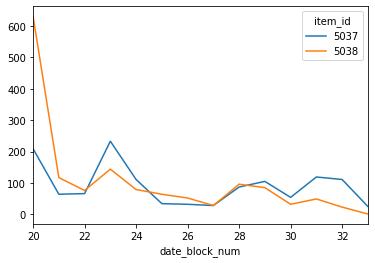

In [43]:
df_sales_shop_id = df_sales.loc[(df_sales['item_cnt_day']>0)&
                                ((df_sales['item_id']==5037)|(df_sales['item_id']==5038))]
df_sales_shop_id = df_sales_shop_id.groupby(['date_block_num','item_id'])['item_cnt_day'].sum()
df_sales_shop_id.unstack(level=1).plot()


# Plot the month sales for shop_id == 2 for item 5037 and 5038

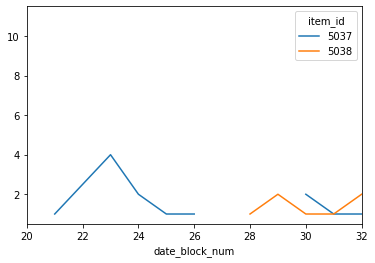

In [61]:
df_sales_shop_id = df_sales.loc[(df_sales['shop_id']==2)&(df_sales['item_cnt_day']>0)&((df_sales['item_id']==5037)|(df_sales['item_id']==5038))]
df_sales_shop_id = df_sales_shop_id.groupby(['date_block_num','item_id'])['item_cnt_day'].sum()
df_sales_shop_id.unstack(level=1).plot()

# Sum the total number of items sold in month 33 for shop_id 2

In [83]:
df_sales_shop_id = df_sales.loc[(df_sales['shop_id']==2)&(df_sales['item_cnt_day']>0)]
df_sales_shop_id = df_sales_shop_id.groupby(['date_block_num','item_id'])['item_cnt_day'].sum()
df_sales_shop_id=df_sales_shop_id.reset_index(name='item_cnt_month')
df_sales_shop_id[df_sales_shop_id['date_block_num']==33]['item_cnt_month'].sum()

727.0